<a href="https://colab.research.google.com/github/muchaimaryanne/Telco-Customer-Churn/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


**General**

Machine learning allows the user to feed a computer algorithm an immense amount of data and have the computer analyze and make data-driven recommendations and decisions based on only the input data. In most of the situations we want to have a machine learning system to make predictions, so we have several categories of machine learning tasks depending on the type of prediction needed: Classification, Regression, Clustering, Generation, etc.

Classification is the task whose goal is the prediction of the label of the class to which the input belongs (e.g., Classification of images in two classes: cats and dogs). Regression is the task whose goal is the prediction of numerical value(s) related to the input (e.g., House rent prediction, Estimated time of arrival ). Generation is the task whose goal is the creation of something new related to the input (e.g., Text translation, Audio beat generation, Image denoising ). Clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other clusters (e.g., Clients clutering).

In machine learning, there are learning paradigms that relate to one aspect of the dataset: the presence of the label to be predicted. Supervised Learning is the paradigm of learning that is applied when the dataset has the label variables to be predicted, known as y variables. Unsupervised Learning is the paradigm of learning that is applied when the dataset has not the label variables to be predicted. Self-supervised Learning is the paradigm of learning that is applied when part of the X dataset is considere as the label to be predicted (e.g., the Dataset is made of texts and the model try to predict the next word of each sentence).

# Notebook overview
In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

# Set Up

**Installation**

Here is the section where we installed all the packages/libraries that will be needed to tackle the challlenge.

In [2]:
#Installatin of packages
!pip install numpy
!pip install pandas
!pip install patool
!pip install forex_python
!pip install pandas_profiling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 KB 7.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.8/136.8 KB 5.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.6 MB 21.8 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 11.7 MB/s eta 0:00:00
     ━━━━

# Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [3]:
# Data handling
import pandas as pd
import numpy as np
from statistics import mean
from forex_python.converter import CurrencyRates
from babel.numbers import format_currency
import datetime as dt
import ydata_profiling as pp


# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn

# Machine learning libraries and metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder, Binarizer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# Other packages
import os
import warnings
warnings.filterwarnings('ignore')
import patoolib
import pickle
from sklearn.pipeline import Pipeline

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [4]:
# Data loading
url = 'https://drive.google.com/file/d/1NVchfOZtO_9G4cgAnKIyNSDbINeh-7q8/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

In [5]:
# Data loading
churn_df = pd.read_csv(url)

In [6]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Hypothesis

In this section we stated our null and alternate hypothesis as well as the questions that we seek to answer.

**Null Hypothesis:** The longer a customer's tenure , the lesser the likelihood that the customer will churn.

**Alternate Hypothesis:** A customers tenure does not determine the likelihood of a churn.

**Questions:**


1. What factors influence churn the most?
2. What is our churning rate?
3. What type of contract churns more customers?
4. What type of internet service churns more customers?
5. What is the longest period of time we have had a customer?
6. What is the shortest period of time we have had a customer ?
7. Which gender churns more ?
8. How many senior citizens are in the data set and what is their proportion?
9. How does the proportion of churned customers differ between senior citizens and non-senior citizens?
10. What is the relationship between tenure and churn ?
11. What is the Relationship between paperlessbilling and Churn?
12. What is the Relationship between payment method and churn?
13. What is the relationship between tenure and customer churn?
14. Do lower Monthly charges increase tenure?
15. Does gender increase affect customer churn?
16. Do higher total charges increase likelihood of churn?

# Exploratory Data Analysis: EDA

Here is the section to inspect the datasets in depth, present it, make hypotheses and think the cleaning, processing and features creation.

**Dataset overview**

Have a look at the loaded datsets using the following methods: .head(), .info()

In [7]:
churn_df.shape

(7043, 21)

The data has 7043 rows and 21 columns

In [8]:
# A quick look at the head of our dataset
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# A look at the last 5 rows in our data set 
churn_df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [10]:
#Look at the columns in the dataset and their data types
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
#Checking for missing values
churn_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The data does not appear to have missing values.

In [12]:
#Checking for NaN values
churn_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The data does not appear to have NaN values.

In [13]:
# Understanding the numerical columns further
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
# Check for duplicates
churn_df.duplicated().sum()

0

In [15]:
# Columns to ignore
to_ignore_cols = [
    "id", # ID
    
]

In [16]:
# running  pandas profiling on the data to get a wholistic view of the data 
pp.ProfileReport(churn_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Issues with the data**

1. More than 600 cutomers have 0 months tenure.
2. Total charges column is an object.
3. Total charges appears to have no missing values when indeed it does.

**How to deal with the Issues**

1. Investigate and see if the tenure of these customers are actually 0.
2. Convert the total charges column to a float.
3. Replace missing values with 0.

# Answering the questions.


1. What is our churn rate?

In [17]:
churn_rate = churn_df.groupby(['Churn'])['customerID'].count().reset_index()
churn_rate.sort_values(['customerID'], ascending = True, inplace=True)
churn_rate

,Churn,customerID
1,Yes,1869
0,No,5174


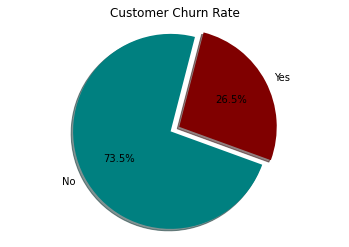

In [18]:
churn_rate_graph = churn_rate['customerID']
mycolors = ['maroon', 'teal']
myexplode = (0, 0.1)
plt.pie(churn_rate_graph, labels=churn_rate['Churn'],autopct='%1.1f%%', startangle=-20, shadow=True, colors=mycolors, explode=myexplode)
plt.title('Customer Churn Rate')
plt.axis('equal')
plt.show()

From the figure above, our churn rate is 26.5%

2. What type of contract churns more customers?

In [19]:
Contract_df = churn_df[['Contract','Churn']].copy()
Contract_df

,Contract,Churn
0,Month-to-month,No
1,One year,No
2,Month-to-month,Yes
3,One year,No
4,Month-to-month,Yes
...,...,...
7038,One year,No
7039,One year,No
7040,Month-to-month,No
7041,Month-to-month,Yes


In [20]:
contact_churn_count= Contract_df.groupby("Contract")["Churn"].value_counts().unstack()
contact_churn_count

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


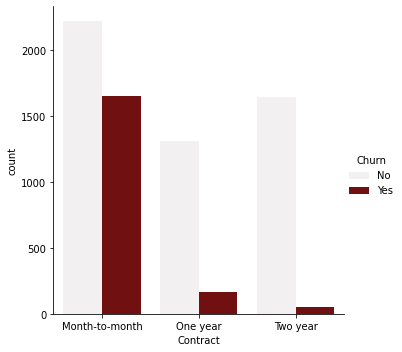

In [21]:
sn.catplot(x="Contract", hue ="Churn",kind="count", color= "maroon", data=Contract_df)

We can deduce that month to month contracts have the highest customer churn with two-year contracts having the lowest

3. What type of internet service churns more customers?

In [22]:
internet_service_counts= churn_df.groupby(['InternetService','Churn']).size().unstack()
internet_service_counts

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


In [23]:
# Normalize the data to show proportions
internet_service_counts = internet_service_counts.div(internet_service_counts.sum(axis=1), axis=0)
internet_service_counts

Churn,No,Yes
InternetService,,
DSL,0.810409,0.189591
Fiber optic,0.581072,0.418928
No,0.925950,0.074050


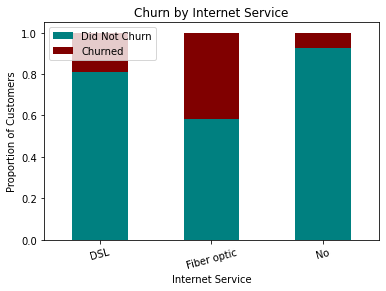

In [24]:
internet_service_counts.plot(kind='bar', stacked=True, color=['teal','maroon'],rot=15)
plt.xlabel('Internet Service')
plt.ylabel('Proportion of Customers')
plt.title('Churn by Internet Service')
plt.legend(['Did Not Churn', 'Churned'])

Customers using fibre optic internet service had a higher churn rate

4. What is the longest period of time we have had a customer?

In [25]:
max_tenure = churn_df["tenure"].max()


f'The longest period we have retained a customer is {max_tenure} months'

'The longest period we have retained a customer is 72 months'

5. What is the shortest period of time we have had a customer ?

In [26]:
min_tenure = churn_df["tenure"].min()

f'The shortest period we have had a customer is {min_tenure} months'

'The shortest period we have had a customer is 0 months'

6. Which gender churns more ?

In [27]:
#count the number of males
gender_counts = churn_df['gender'].value_counts()
num_males=gender_counts['Male']
f'The total number of Males is {num_males}'

'The total number of Males is 3555'

In [28]:
#count the number of females
num_females=gender_counts['Female']
f'The total number of Females is {num_females}'

'The total number of Females is 3488'

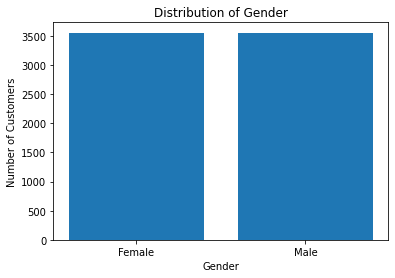

In [29]:
# create a bar chart to visualize the results
labels = ['Female', 'Male']
values = [len(churn_df) - num_females, num_males]
plt.bar(labels, values)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

In [30]:
# finding the number of  customers who churn and those that did not by gender
gender= churn_df.groupby("gender")["Churn"].value_counts().unstack()
gender

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [31]:
# calculating the ratio of yes to no by gender 
gender['ratio'] = gender['Yes'] / gender['No']
gender

Churn,No,Yes,ratio
gender,,,
Female,2549,939,0.368380
Male,2625,930,0.354286


In [32]:
mean_ratio_by_gender = gender.groupby('gender')['ratio'].mean()
mean_ratio_by_gender

gender
Female    0.368380
Male      0.354286
Name: ratio, dtype: float64

In [33]:
f'The mean ratio of male to Female who churned is slightly higher than that of males'

'The mean ratio of male to Female who churned is slightly higher than that of males'

7. How many senior citizens are in the data set and what is their proportion?

In [34]:
#count the number of senior citizens
num_senior = churn_df['SeniorCitizen'].sum()
f'The number of senior citizens is {num_senior}'

'The number of senior citizens is 1142'

In [35]:
# calculate the proportion of senior citizens
prop_senior = num_senior / len(churn_df)
f'The proportion of senior citizens of the entire data set is {prop_senior:.2f}'

'The proportion of senior citizens of the entire data set is 0.16'

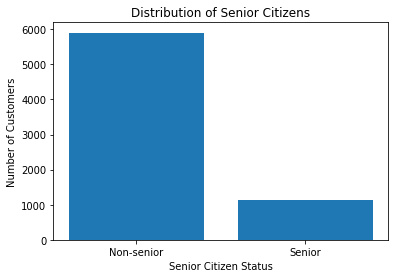

In [36]:
# create a bar chart to visualize the results
labels = ['Non-senior', 'Senior']
values = [len(churn_df) - num_senior, num_senior]
plt.bar(labels, values)
plt.title('Distribution of Senior Citizens')
plt.xlabel('Senior Citizen Status')
plt.ylabel('Number of Customers')
plt.show()

8. How does the proportion of churned customers differ between senior citizens and non-senior citizens?

In [37]:
# calculate the proportion of churned customers for each seniorcitizen group
proportions = churn_df.groupby('SeniorCitizen')['Churn'].apply(lambda x: (x=='Yes').mean())
proportions

SeniorCitizen
0    0.236062
1    0.416813
Name: Churn, dtype: float64

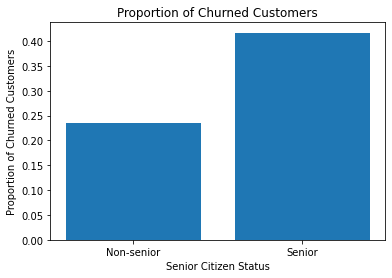

In [38]:
# create a bar chart to visualize the results
labels = ['Non-senior', 'Senior']
values = proportions.values
plt.bar(labels, values)
plt.title('Proportion of Churned Customers')
plt.xlabel('Senior Citizen Status')
plt.ylabel('Proportion of Churned Customers')
plt.show()

From the diagram we see that 41% of senior citizen churned and 23 % of non senior citizens churned

9. What is the relationship between tenure and Churn

In [39]:
# convert churn column to binary values
churn_df['Churn'] = churn_df['Churn'].map({'Yes': 1, 'No': 0})

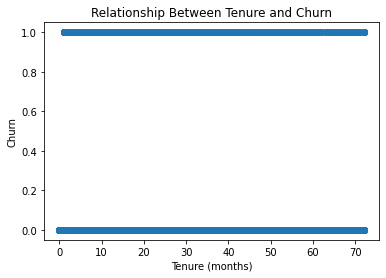

Correlation coefficient: -0.352228670113078


In [40]:
# create a scatter plot
plt.scatter(churn_df['tenure'], churn_df['Churn'])
plt.title('Relationship Between Tenure and Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Churn')
plt.show()


# calculate the correlation coefficient
corr = churn_df['tenure'].corr(churn_df['Churn'])
print('Correlation coefficient:', corr)


Even though we have a negative correlation co effiecient of -0.3522 from our grapgh, we can deduce that there is no clear relationship between the tenure and Churn. Tenure of a customer is not a good predictor of their likelihood to churn.

10. Relationship between paperlessbilling and Churn

In [41]:
# convert PaperlessBilling column to binary values
churn_df['PaperlessBilling'] = churn_df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

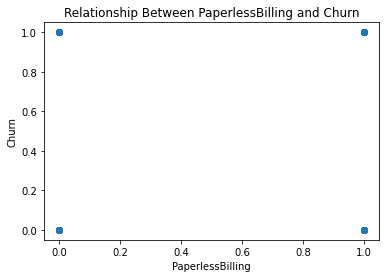

Correlation coefficient: 0.19182533166646867


In [42]:
# create a scatter plot
plt.scatter(churn_df['PaperlessBilling'], churn_df['Churn'])
plt.title('Relationship Between PaperlessBilling and Churn')
plt.xlabel('PaperlessBilling')
plt.ylabel('Churn')
plt.show()

# calculate the correlation coefficient
corr = churn_df['PaperlessBilling'].corr(churn_df['Churn'])
print('Correlation coefficient:', corr)

There is no correlation between PaperlesBilling and Churn

11. Relationship between payment method and churning

In [43]:
payment_grouped = churn_df.groupby(['PaymentMethod', 'Churn']).size().unstack()
payment_grouped

Churn,0,1
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


In [44]:
# Normalize the data to show proportions
payment_grouped = payment_grouped.div(payment_grouped.sum(axis=1), axis=0)
payment_grouped

Churn,0,1
PaymentMethod,,
Bank transfer (automatic),0.832902,0.167098
Credit card (automatic),0.847569,0.152431
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067


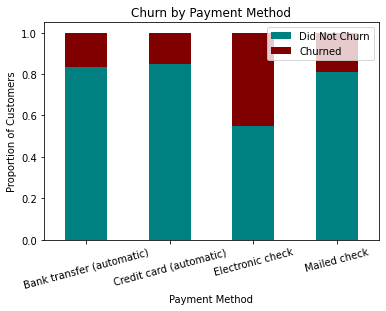

In [45]:
payment_grouped.plot(kind='bar', stacked=True, color=['teal','maroon'],rot=15)
plt.xlabel('Payment Method')
plt.ylabel('Proportion of Customers')
plt.title('Churn by Payment Method')
plt.legend(['Did Not Churn', 'Churned'])

plt.show()

Electronic Check issuers were more likely to churn than any other payment method

12. Does gender affect customer churn?

The number of customers who churned by gender is almost equal as seen previously so gender does not seem to have and effect on churn


13. Do lower Monthly charges increase tenure?

In [46]:
#Sorting by monthly charges to see effect on churn
churn_by_charges = churn_df.sort_values('MonthlyCharges', ascending=False)
churn_by_charges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4586,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,1,Bank transfer (automatic),118.75,8672.45,0
2115,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,1,Electronic check,118.65,8477.6,0
3894,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,0,Mailed check,118.60,7990.05,0
4804,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,1,Electronic check,118.60,7365.7,0
5127,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,1,Bank transfer (automatic),118.35,7804.15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6906,9945-PSVIP,Female,0,Yes,Yes,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,1,Mailed check,18.70,383.65,0
1156,0621-CXBKL,Female,0,No,No,53,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,18.70,1005.7,0
6652,0827-ITJPH,Male,0,No,No,36,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,1,Credit card (automatic),18.55,689,0
1529,9764-REAFF,Female,0,Yes,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Bank transfer (automatic),18.40,1057.85,0


<AxesSubplot:title={'center':'Churn of customers for the top 500 highest monthly charges'}, xlabel='Churn', ylabel='count'>

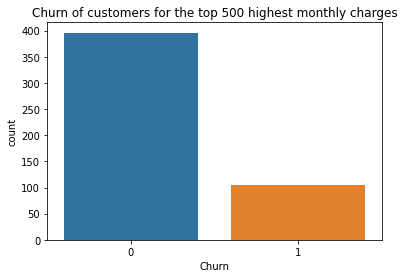

In [47]:
# Churn by highest charges plot
plt.title('Churn of customers for the top 500 highest monthly charges')
sn.countplot(x ='Churn', data = churn_by_charges.head(500))

<AxesSubplot:title={'center':'Churn of customers for the bottom 500 highest monthly charges'}, xlabel='Churn', ylabel='count'>

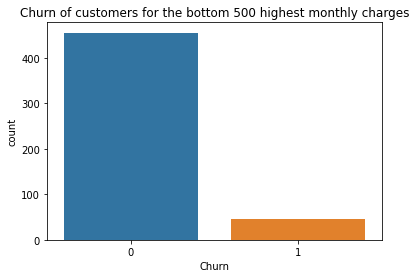

In [48]:
# Churn by lowest charges plot
plt.title('Churn of customers for the bottom 500 highest monthly charges')
sn.countplot(x ='Churn', data = churn_by_charges.tail(500))

The monthly charges does not seem to have a significant effect on a customer's desision to churn.

14. What is the relationship between tenure and churn?

In [49]:
churn_by_tenure = churn_df.sort_values('tenure', ascending=False)
churn_by_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1672,4737-AQCPU,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,Two year,0,Credit card (automatic),72.10,5016.65,0
193,9680-NIAUV,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,0,Credit card (automatic),109.70,8129.3,0
4553,5914-XRFQB,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,1,Bank transfer (automatic),115.80,8424.9,0
483,5168-MQQCA,Female,0,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,1,Bank transfer (automatic),108.50,8003.8,0
3266,0464-WJTKO,Female,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Bank transfer (automatic),20.10,1460.85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,25.75,,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,25.35,,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,0,Mailed check,80.85,,0
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,1,Bank transfer (automatic),61.90,,0


<AxesSubplot:title={'center':'Churn of customers for top 500 highest tenures'}, xlabel='Churn', ylabel='count'>

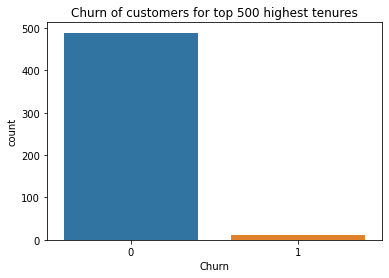

In [50]:
# Churn by highest tenure
plt.title('Churn of customers for top 500 highest tenures')
sn.countplot(x ='Churn', data = churn_by_tenure.head(500))

<AxesSubplot:title={'center':'Churn of customers for bottom 500 highest tenures'}, xlabel='Churn', ylabel='count'>

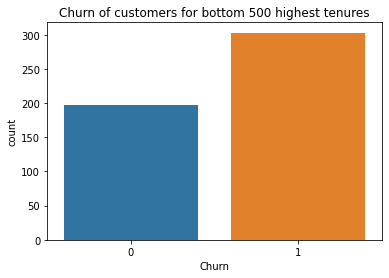

In [51]:
# Churn by lowest tenure
plt.title('Churn of customers for bottom 500 highest tenures')
sn.countplot(x ='Churn', data = churn_by_tenure.tail(500))

The longer the tenure of a customer the less likely they are to churn.

15. Do higher total charges increase likelihood of customer churn?

In [52]:
churn_df['TotalCharges'] = churn_df['TotalCharges'].replace([' '], 0.0)

In [53]:
churn_df['TotalCharges'] = churn_df['TotalCharges'].astype(float)

In [54]:
churn_by_tcharges = churn_df.sort_values('TotalCharges', ascending=False)
churn_by_tcharges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4610,2889-FPWRM,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,1,Bank transfer (automatic),117.80,8684.80,1
4586,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,1,Bank transfer (automatic),118.75,8672.45,0
6768,9739-JLPQJ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,0,Credit card (automatic),117.50,8670.10,0
5347,9788-HNGUT,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,1,Credit card (automatic),116.95,8594.40,0
2187,8879-XUAHX,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,1,Electronic check,116.25,8564.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,25.75,0.00,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,1,Mailed check,19.70,0.00,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,20.00,0.00,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,0,Mailed check,73.35,0.00,0


<AxesSubplot:title={'center':'Churn of customers for top 500 highest total charges'}, xlabel='Churn', ylabel='count'>

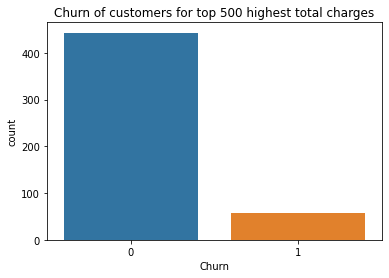

In [55]:
# Churn by highest total charges
plt.title('Churn of customers for top 500 highest total charges')
sn.countplot(x ='Churn', data = churn_by_tcharges.head(500))

<AxesSubplot:title={'center':'Churn of customers for bottom 500 lowest total charges'}, xlabel='Churn', ylabel='count'>

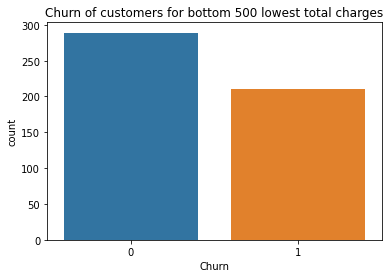

In [56]:
# Churn by lowest total charges
plt.title('Churn of customers for bottom 500 lowest total charges')
sn.countplot(x ='Churn', data = churn_by_tcharges.tail(500))

Higher total charges does not seem to increase likelihood of customer churn

What factors seem to affect churn the most?

1. Tenure

From our analysis, we fail to reject the Null Hypothesis; The longer a customer's tenure , the lesser the likelihood that the customer will churn.

# Univariate Data Analysis

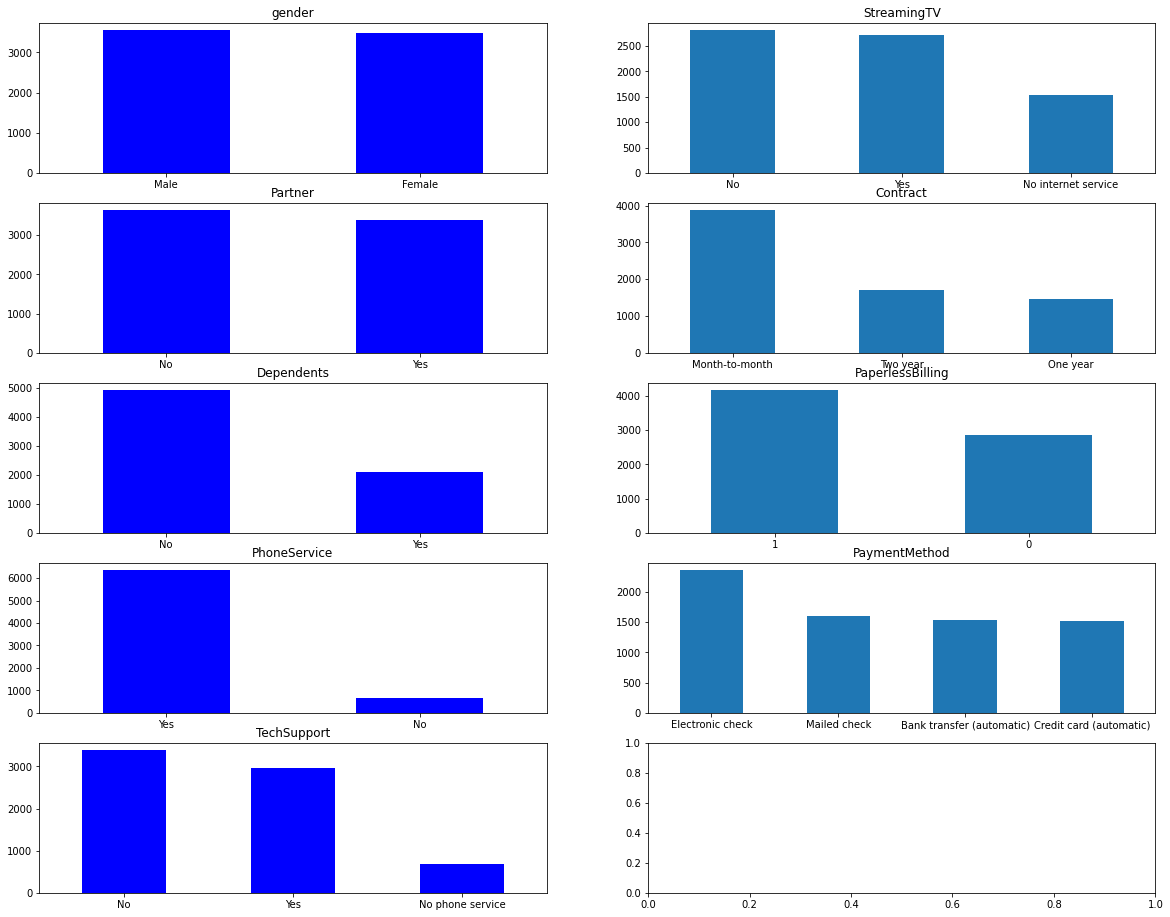

In [57]:
# Distribution of Categorical coulmns
Categorical_columns = churn_df[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod']]
fig, axes = plt.subplots(nrows = 5,ncols = 2, figsize = (20,16),squeeze=False)



for i, feature in enumerate(Categorical_columns):
    if i < 5:
        ax = churn_df[feature].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color='blue')
    
   
    elif i >=10 and i < 15:
        ax = churn_df[feature].value_counts().plot(kind = 'bar',ax=axes[i-10,1],rot = 0)

    ax.set_title(feature)

# Multi variate Data Analysis

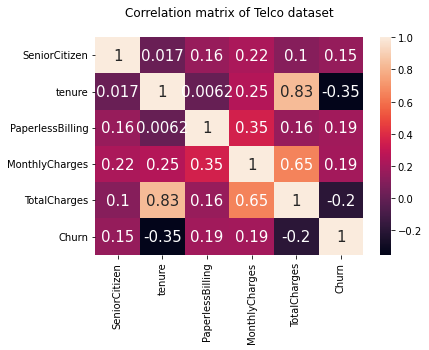

In [58]:
# Finding the correlation among the variables.
correlation = churn_df.corr()
heatmap = sn.heatmap(correlation, annot = True,annot_kws={'size': 15})
heatmap.set( title = "Correlation matrix of Telco dataset\n") 
plt.show ()  

# Feature Processing & Engineering

Here is the section to clean, process the dataset and create new features.

**Drop Duplicates**

In [59]:
duplicates = churn_df.duplicated()
print(churn_df[duplicates])

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


There are no Duplicate rows

**Impute Missing Values**

In [60]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [61]:
churn_df['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [62]:
churn_df.sort_values('tenure', ascending=True)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,0,Credit card (automatic),56.05,0.00,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,0,Mailed check,80.85,0.00,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,0,Mailed check,73.35,0.00,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,20.00,0.00,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,1,Mailed check,19.70,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,6024-RUGGH,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,1,Bank transfer (automatic),25.20,1798.90,0
917,4079-WWQQQ,Male,0,No,No,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,1,Bank transfer (automatic),65.55,4807.45,0
4574,8999-XXGNS,Female,1,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),105.75,7629.85,0
3635,5296-PSYVW,Female,0,Yes,No,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Electronic check,24.55,1750.70,0


From careful observation, we notice that when tenure is 0  the TotalCharges columnn is 0 meaning these cutomers havent been charged yet as at when data was collected. 

# Features Encoding

Using OneHot Encoder.

In [63]:
# Cleaning the categorical columns
churn_df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [64]:
churn_df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [65]:
churn_df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [66]:
churn_df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [67]:
churn_df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [68]:
churn_df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [69]:
churn_df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [70]:
churn_df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [71]:
churn_df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [72]:
churn_df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [73]:
churn_df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [74]:
churn_df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [75]:
churn_df['PaperlessBilling'].unique()

array([1, 0])

In [76]:
churn_df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [77]:
#Converting churn and Paperless billing back to object
churn_df['Churn'] = churn_df['Churn'].replace([1], 'Yes')
churn_df['Churn'] = churn_df['Churn'].replace([0], 'No')


In [78]:
churn_df['PaperlessBilling'] = churn_df['PaperlessBilling'].replace([1], 'Yes')
churn_df['PaperlessBilling'] = churn_df['PaperlessBilling'].replace([0], 'No')

In [79]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [80]:
# Proceeding to encode using OneHotEncoder.
cat_columns = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

num_columns = ['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']

In [81]:
# Encoder instance
from sklearn.preprocessing import OneHotEncoder

cat_encoder= OneHotEncoder(drop="first")

churn_encoded_data = cat_encoder.fit_transform(churn_df[cat_columns])
churn_encoded_data

<7043x26 sparse matrix of type '<class 'numpy.float64'>'
	with 60050 stored elements in Compressed Sparse Row format>

In [82]:
#Converting encoded array to df
churn_encoded_df = pd.DataFrame(churn_encoded_data.toarray(), columns=cat_encoder.get_feature_names_out(['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']))

In [83]:
churn_encoded_df

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7039,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7040,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7041,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# Feature Scaling

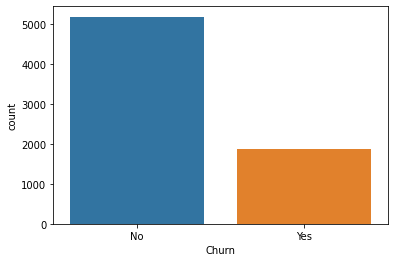

In [84]:
# Showing number of churned customers vs those who didn't
sn.countplot(x ='Churn', data = churn_df)
plt.show()

The dataset is imbalanced hence feature scaling is necessary.

In [85]:
# Instanciating the scaler.

scaler = StandardScaler()

In [86]:
# Fitting it to numerical columns.

churn_scaled_data = StandardScaler().fit_transform(churn_df[num_columns])

In [87]:
# Converting the array to a df.

churn_scaled_df = pd.DataFrame(churn_scaled_data, columns=scaler.get_feature_names_out(['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']))

In [88]:
churn_scaled_df

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,-1.277445,-0.439916,-1.160323,-0.992611
1,0.066327,-0.439916,-0.259629,-0.172165
2,-1.236724,-0.439916,-0.362660,-0.958066
3,0.514251,-0.439916,-0.746535,-0.193672
4,-1.236724,-0.439916,0.197365,-0.938874
...,...,...,...,...
7038,-0.340876,-0.439916,0.665992,-0.127605
7039,1.613701,-0.439916,1.277533,2.242606
7040,-0.870241,-0.439916,-1.168632,-0.852932
7041,-1.155283,2.273159,0.320338,-0.870513


In [89]:
# Encoding the target column using label encoder.

le = LabelEncoder()
target = churn_df['Churn']
y_encoded = le.fit_transform(target)

In [90]:
y_encoded

array([0, 0, 1, ..., 0, 1, 0])

In [91]:
# Concatinating the numerical and categorical columns

churn_ready_df = pd.concat([churn_scaled_df,churn_encoded_df], axis=1)

In [92]:
churn_ready_df

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,-0.439916,-1.160323,-0.992611,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.066327,-0.439916,-0.259629,-0.172165,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.236724,-0.439916,-0.362660,-0.958066,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.514251,-0.439916,-0.746535,-0.193672,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.236724,-0.439916,0.197365,-0.938874,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.340876,-0.439916,0.665992,-0.127605,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7039,1.613701,-0.439916,1.277533,2.242606,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7040,-0.870241,-0.439916,-1.168632,-0.852932,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7041,-1.155283,2.273159,0.320338,-0.870513,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# Dataset Splitting

In this section we split our dataset to train,eval and test sets.

In [93]:
# Splitting to train and test
X = churn_ready_df
y = y_encoded


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [94]:
# Splitting train further to eval

X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [95]:
X_train.shape

(4507, 30)

In [96]:
X_test.shape

(1409, 30)

In [97]:
X_eval.shape

(1127, 30)

In [98]:
y_train.shape

(4507,)

In [99]:
y_test.shape

(1409,)

In [100]:
y_eval.shape

(1127,)

# Modelling

In this section we train, evaluate an test our selected models using our different datasets. We then compare each models peformance.

**Feature Selection**

In [101]:
# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [102]:
# Get the feature importance scores
importances = rf_model.feature_importances_

In [103]:
# Sort the features by importance score
sorted_indices = np.argsort(importances)[::-1]

In [104]:
# Print the feature ranking
print("Feature ranking:")
for i in sorted_indices:
    print(f"{i+1}. Feature {i} ({importances[i]:.4f})")

Feature ranking:
4. Feature 3 (0.1830)
1. Feature 0 (0.1769)
3. Feature 2 (0.1684)
29. Feature 28 (0.0424)
11. Feature 10 (0.0377)
26. Feature 25 (0.0292)
5. Feature 4 (0.0284)
14. Feature 13 (0.0270)
27. Feature 26 (0.0257)
6. Feature 5 (0.0239)
20. Feature 19 (0.0235)
25. Feature 24 (0.0217)
16. Feature 15 (0.0217)
10. Feature 9 (0.0216)
2. Feature 1 (0.0213)
7. Feature 6 (0.0192)
18. Feature 17 (0.0188)
22. Feature 21 (0.0179)
24. Feature 23 (0.0169)
28. Feature 27 (0.0132)
30. Feature 29 (0.0122)
13. Feature 12 (0.0092)
17. Feature 16 (0.0088)
21. Feature 20 (0.0057)
15. Feature 14 (0.0055)
19. Feature 18 (0.0049)
9. Feature 8 (0.0045)
8. Feature 7 (0.0041)
23. Feature 22 (0.0037)
12. Feature 11 (0.0030)


In [105]:
# Select the top k features
k = 10
selected_features = sorted_indices[:k]
selected_features

array([ 3,  0,  2, 28, 10, 25,  4, 13, 26,  5])

In [106]:
# Train a new classifier using only the selected features
X_train_selected = X_train.iloc[:, selected_features]
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [107]:
# making sure that the test set has the same columns as the training set before slicing it with selected_features
X_test_selected = X_test.iloc[:, selected_features]

In [108]:
# using X_test_selected to make predictions using your trained model:
y_pred = rf_model_selected.predict(X_test_selected)

In [109]:
#classification report for your model's performance on the test set.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1035
           1       0.58      0.46      0.51       374

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409



**Random Forest Classifier**

In [110]:
# creating the model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.set_params(**{'n_estimators': 100, 'random_state': 42})

RandomForestClassifier(random_state=42)

In [111]:
# Train the model on the training set
rfc.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [112]:
# Fit the eval set with the same features as train set
X_eval_selected = X_eval.iloc[:, selected_features]
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_selected.fit(X_eval_selected, y_eval)

RandomForestClassifier(random_state=42)

In [113]:
# Evaluate the Model on the Evaluation dataset 

y_pred = rfc.predict(X_eval_selected)

In [114]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [115]:
# Compute the valid metrics for the use case # Optional: show the classification report 
accuracy = accuracy_score(y_eval, y_pred)
precision = precision_score(y_eval, y_pred)
recall = recall_score(y_eval, y_pred)
f1 = f1_score(y_eval, y_pred)


#classification report for the model's performance on the eval set.
RFCM=(classification_report(y_eval, y_pred))

print(RFCM)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       839
           1       0.59      0.49      0.54       288

    accuracy                           0.78      1127
   macro avg       0.71      0.69      0.70      1127
weighted avg       0.77      0.78      0.78      1127



In [116]:
rfc_metrics = {'f1-score_0': 0.86, 'precision_0': 0.84, 'recall_0': 0.88, 'f1-score_1':0.54, 'precision_1': 0.59, 'recall_1':0.49}

In [117]:
# Fit the test set with the same features as train set
X_test_selected = X_test.iloc[:, selected_features]
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_selected.fit(X_test_selected, y_test)

RandomForestClassifier(random_state=42)

In [118]:
# Train the model on the test set
rfc.fit(X_test_selected, y_test)

RandomForestClassifier(random_state=42)

In [119]:
# Predict on a unknown dataset (Testset)

test_pred = rfc.predict(X_test_selected)

In [120]:
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [121]:
# Compute the valid metrics for the use case # Optional: show the classification report 
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)


#classification report for the model's performance on the eval set.
RFCM=(classification_report(y_test, test_pred))

print(RFCM)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



**Gradient Boosting Classifier Model**

In [122]:
# Initialize the model with default hyperparameters
gbc = GradientBoostingClassifier(random_state=42)

In [123]:
# Fit the model on the training data
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [124]:
# Make predictions on the evaluation set
y_pred = gbc.predict(X_eval)

In [125]:
y_pred

array([0, 0, 0, ..., 1, 1, 0])

In [126]:
#classification report for the model's performance on the evalset.
GBCM= (classification_report(y_eval, y_pred))


print(GBCM)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       839
           1       0.65      0.49      0.56       288

    accuracy                           0.80      1127
   macro avg       0.74      0.70      0.72      1127
weighted avg       0.79      0.80      0.79      1127



In [127]:
gbc_metrics = {'f1-score_0': 0.87, 'precision_0': 0.84, 'recall_0': 0.91, 'f1-score_1':0.56, 'precision_1': 0.65, 'recall_1':0.49}

In [128]:
# Make predictions on an unkown dataset i.e. test

test_pred = gbc.predict(X_test)

In [129]:
test_pred

array([0, 1, 0, ..., 0, 0, 0])

In [130]:
#classification report for the model's performance on the test set.
GBCM= (classification_report(y_test, test_pred))


print(GBCM)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.68      0.52      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



**Logistics Regression Model**

In [131]:
# Instanciate the model

lr = LogisticRegression(random_state=42)

In [132]:
# Train the model on the training set

lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [133]:
y_pred = lr.predict(X_eval)

In [134]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [135]:
#classification report for the model's performance on the eval set.
LRM=(classification_report(y_eval, y_pred))


print(LRM)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       839
           1       0.63      0.53      0.58       288

    accuracy                           0.80      1127
   macro avg       0.74      0.71      0.73      1127
weighted avg       0.79      0.80      0.80      1127



In [136]:
lr_metrics = {'f1-score_0': 0.87, 'precision_0': 0.85, 'recall_0': 0.89, 'f1-score_1':0.58, 'precision_1': 0.63, 'recall_1':0.53}

In [137]:
# Predicting on an unkown dataset

test_pred = lr.predict(X_test)

In [138]:
test_pred

array([0, 1, 0, ..., 0, 0, 0])

In [139]:
#classification report for the model's performance on the test set.
LRM=(classification_report(y_test, test_pred))


print(LRM)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



# Models comparison

Creating a pandas dataframe that will allow us to compare our models.

In [140]:
models = []

In [141]:
models.append('RFC')

In [142]:
models.append('GBC')

In [143]:
models.append('LR')

In [144]:
metrics_list = [rfc_metrics, gbc_metrics, lr_metrics]

In [145]:
combined_metrics = []
for i, m in enumerate(metrics_list):
    m['model'] = models[i]
    combined_metrics.append(m)

In [146]:
metrics_df = pd.DataFrame(combined_metrics)
metrics_df.set_index('model', inplace=True)

In [147]:
print(metrics_df)

       f1-score_0  precision_0  recall_0  f1-score_1  precision_1  recall_1
model                                                                      
RFC          0.86         0.84      0.88        0.54         0.59      0.49
GBC          0.87         0.84      0.91        0.56         0.65      0.49
LR           0.87         0.85      0.89        0.58         0.63      0.53


Our models seem to be better at predicting possibility of a customer not churning than the possibility of a customer churning.

# Hyper Parameter tuning.

Fine-tuning the Top-k models (3 < k < 5) using a GridSearchCV (that is in sklearn.model_selection ) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then comparing them again to select the best one.

In [148]:
models_trained = []

In [149]:
models_trained.append(rfc)

In [150]:
models_trained.append(gbc)

In [151]:
models_trained.append(lr)

In [152]:
print(models_trained[0].get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [153]:
# Getting the best hyper parameters

best_models_trained = []

**Hp tuning model #1**

In [154]:
models_trained[0]

RandomForestClassifier(random_state=42)

In [155]:
# Getting the best hyper parameters for RFC

models_trained[0].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [156]:
parameters = {'bootstrap': [True],
 'ccp_alpha': [0.0],
 'class_weight': [None],
 'criterion': ['gini','entropy','log_loss'],
 'max_depth': [None],
 'max_features': ['sqrt','log2'],
 'max_leaf_nodes': [None],
 'max_samples': [None],
 'min_impurity_decrease': [0.0],
 'min_samples_leaf': [2],
 'min_samples_split': [4],
 'min_weight_fraction_leaf': [0.0],
 'n_estimators': [50],
 'n_jobs': [None],
 'oob_score': [False],
 'random_state': [10],
 'verbose': [0],
 'warm_start': [False]}

In [157]:
# instantiate the Searcher
searcher = GridSearchCV(
    estimator=models_trained[0],
    param_grid=parameters,
    scoring=['accuracy', 'f1', 'precision', 'recall'],
    refit='precision', 
    cv=10, 
    verbose=3 
)
     


In [158]:
searcher.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10] END bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None, oob_score=False, random_state=10, verbose=0, warm_start=False; accuracy: (test=0.805) f1: (test=0.560) precision: (test=0.709) recall: (test=0.463) total time=   0.3s
[CV 2/10] END bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None, oob_score=False, random_state=10, verbose=0, warm_start=False; accuracy: (test=0.794) f1: (test=0.546) precision: (test=0.667) recall: (test=0.463) total time=   0.3s
[CV 3/10] END bootstrap=True, ccp_alpha=0

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True], 'ccp_alpha': [0.0],
                         'class_weight': [None],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None], 'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [None], 'max_samples': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [2], 'min_samples_split': [4],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [50], 'n_jobs': [None],
                         'oob_score': [False], 'random_state': [10],
                         'verbose': [0], 'warm_start': [False]},
             refit='precision',
             scoring=['accuracy', 'f1', 'precision', 'recall'], verbose=3)

In [159]:
search_history = pd.DataFrame(searcher.cv_results_)
search_history

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_ccp_alpha,param_class_weight,param_criterion,param_max_depth,param_max_features,...,split3_test_recall,split4_test_recall,split5_test_recall,split6_test_recall,split7_test_recall,split8_test_recall,split9_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,0.261889,0.012026,0.018013,0.003303,True,0.0,None,gini,None,sqrt,...,0.487603,0.570248,0.553719,0.520661,0.550000,0.491667,0.516667,0.507899,0.038436,4
1,0.229458,0.009234,0.017465,0.002732,True,0.0,None,gini,None,log2,...,0.446281,0.586777,0.553719,0.512397,0.550000,0.466667,0.541667,0.508726,0.044420,3
2,0.279595,0.013423,0.017818,0.001432,True,0.0,None,entropy,None,sqrt,...,0.446281,0.570248,0.553719,0.495868,0.533333,0.491667,0.491667,0.509518,0.033954,1
3,0.370903,0.067287,0.023608,0.005477,True,0.0,None,entropy,None,log2,...,0.454545,0.578512,0.586777,0.528926,0.508333,0.441667,0.525000,0.499566,0.051194,5
4,0.442442,0.059354,0.026443,0.005856,True,0.0,None,log_loss,None,sqrt,...,0.446281,0.570248,0.553719,0.495868,0.533333,0.491667,0.491667,0.509518,0.033954,1
5,0.246576,0.007925,0.015957,0.000361,True,0.0,None,log_loss,None,log2,...,0.454545,0.578512,0.586777,0.528926,0.508333,0.441667,0.525000,0.499566,0.051194,5


In [160]:
searcher.best_estimator_

RandomForestClassifier(max_features='log2', min_samples_leaf=2,
                       min_samples_split=4, n_estimators=50, random_state=10)

In [161]:
best_models_trained.append(searcher.best_estimator_)

**Hp tuning model #2**

In [162]:
models_trained[1].get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [163]:
parameters = {
 'n_estimators': [30, 50, 100, 200, 300],
 'random_state': [20],
 'ccp_alpha': [0.0],
 'criterion': ['friedman_mse','squared_error'],
 'max_depth': [2],
 'max_features': ['auto','sqrt','log2'],
 'max_leaf_nodes': [None],
 'min_impurity_decrease': [1],
}

In [166]:
# instantiate the Searcher
searcher = GridSearchCV(
    estimator=models_trained[1],
    param_grid=parameters,
    scoring=['accuracy', 'f1', 'precision', 'recall'],
    refit='precision', 
    cv=5, 
    verbose=3 
)

In [167]:
searcher.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ccp_alpha=0.0, criterion=friedman_mse, max_depth=2, max_features=auto, max_leaf_nodes=None, min_impurity_decrease=1, n_estimators=30, random_state=20; accuracy: (test=0.799) f1: (test=0.520) precision: (test=0.726) recall: (test=0.405) total time=   0.2s
[CV 2/5] END ccp_alpha=0.0, criterion=friedman_mse, max_depth=2, max_features=auto, max_leaf_nodes=None, min_impurity_decrease=1, n_estimators=30, random_state=20; accuracy: (test=0.785) f1: (test=0.513) precision: (test=0.654) recall: (test=0.421) total time=   0.2s
[CV 3/5] END ccp_alpha=0.0, criterion=friedman_mse, max_depth=2, max_features=auto, max_leaf_nodes=None, min_impurity_decrease=1, n_estimators=30, random_state=20; accuracy: (test=0.795) f1: (test=0.532) precision: (test=0.682) recall: (test=0.436) total time=   0.2s
[CV 4/5] END ccp_alpha=0.0, criterion=friedman_mse, max_depth=2, max_features=auto, max_leaf_nodes=None, min_impurity_decrease=1, n_es

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.0],
                         'criterion': ['friedman_mse', 'squared_error'],
                         'max_depth': [2],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [None], 'min_impurity_decrease': [1],
                         'n_estimators': [30, 50, 100, 200, 300],
                         'random_state': [20]},
             refit='precision',
             scoring=['accuracy', 'f1', 'precision', 'recall'], verbose=3)

In [168]:
search_history = pd.DataFrame(searcher.cv_results_)
search_history

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_impurity_decrease,...,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,0.226244,0.005871,0.011140,0.000383,0.0,friedman_mse,2,auto,None,1,...,0.025858,4,0.404959,0.421488,0.435685,0.460581,0.414938,0.427530,0.019305,13
1,0.355863,0.009988,0.012467,0.000376,0.0,friedman_mse,2,auto,None,1,...,0.018632,5,0.438017,0.454545,0.477178,0.489627,0.456432,0.463160,0.018159,7
2,0.393424,0.019348,0.007720,0.000117,0.0,friedman_mse,2,auto,None,1,...,0.018632,5,0.438017,0.454545,0.477178,0.489627,0.456432,0.463160,0.018159,7
3,0.676542,0.001457,0.009653,0.002903,0.0,friedman_mse,2,auto,None,1,...,0.018632,5,0.438017,0.454545,0.477178,0.489627,0.456432,0.463160,0.018159,7
4,0.932945,0.009540,0.008252,0.000103,0.0,friedman_mse,2,auto,None,1,...,0.018632,5,0.438017,0.454545,0.477178,0.489627,0.456432,0.463160,0.018159,7
5,0.096684,0.011028,0.012904,0.001542,0.0,friedman_mse,2,sqrt,None,1,...,0.030775,2,0.367769,0.347107,0.427386,0.406639,0.377593,0.385299,0.028467,15
6,0.160477,0.014552,0.012497,0.000361,0.0,friedman_mse,2,sqrt,None,1,...,0.025346,9,0.429752,0.421488,0.493776,0.485477,0.443983,0.454895,0.029374,11
7,0.267351,0.019478,0.012343,0.001060,0.0,friedman_mse,2,sqrt,None,1,...,0.029370,10,0.466942,0.446281,0.506224,0.518672,0.460581,0.479740,0.027812,4
8,0.467415,0.027297,0.014209,0.002187,0.0,friedman_mse,2,sqrt,None,1,...,0.029370,10,0.466942,0.446281,0.506224,0.518672,0.460581,0.479740,0.027812,4
9,0.585223,0.112119,0.012257,0.003142,0.0,friedman_mse,2,sqrt,None,1,...,0.029370,10,0.466942,0.446281,0.506224,0.518672,0.460581,0.479740,0.027812,4


In [169]:
searcher.best_estimator_

GradientBoostingClassifier(max_depth=2, max_features='log2',
                           min_impurity_decrease=1, n_estimators=30,
                           random_state=20)

In [170]:
best_models_trained.append(searcher.best_estimator_)

**Hp tuning model #3**

In [171]:
models_trained[2].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [172]:
parameters = {'C': [1.0],
 'class_weight': ['balanced'],
 'dual': [False],
 'fit_intercept': [True],
 'intercept_scaling': [1],
 'l1_ratio': [None],
 'max_iter': [150],
 'multi_class':[ 'auto','ovr','multinomial'],
 'n_jobs': [None],
 'penalty': ['l2','l1','elasticnet'],
 'random_state': [42],
 'solver': ['lbfgs','liblinear','newton-cg','saga'],
 'tol': [0.0001],
 'verbose': [0],
 'warm_start': [False]}

In [175]:
# instantiate the Searcher
searcher = GridSearchCV(
    estimator=models_trained[2],
    param_grid=parameters,
    scoring=['accuracy', 'f1', 'precision', 'recall'],
    refit='precision', 
    cv=5, 
    verbose=3 
)

In [176]:
searcher.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END C=1.0, class_weight=balanced, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=150, multi_class=auto, n_jobs=None, penalty=l2, random_state=42, solver=lbfgs, tol=0.0001, verbose=0, warm_start=False; accuracy: (test=0.745) f1: (test=0.628) precision: (test=0.516) recall: (test=0.802) total time=   0.1s
[CV 2/5] END C=1.0, class_weight=balanced, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=150, multi_class=auto, n_jobs=None, penalty=l2, random_state=42, solver=lbfgs, tol=0.0001, verbose=0, warm_start=False; accuracy: (test=0.741) f1: (test=0.624) precision: (test=0.511) recall: (test=0.802) total time=   0.1s
[CV 3/5] END C=1.0, class_weight=balanced, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=150, multi_class=auto, n_jobs=None, penalty=l2, random_state=42, solver=lbfgs, tol=0.0001, verbose=0, warm_start=False; accuracy: 

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1.0], 'class_weight': ['balanced'],
                         'dual': [False], 'fit_intercept': [True],
                         'intercept_scaling': [1], 'l1_ratio': [None],
                         'max_iter': [150],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'n_jobs': [None],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'random_state': [42],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga'],
                         'tol': [0.0001], 'verbose': [0],
                         'warm_start': [False]},
             refit='precision',
             scoring=['accuracy', 'f1', 'precision', 'recall'], verbose=3)

In [177]:
search_history = pd.DataFrame(searcher.cv_results_)
search_history

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_dual,param_fit_intercept,param_intercept_scaling,param_l1_ratio,...,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,0.064802,0.008087,0.010352,0.000468,1.0,balanced,False,True,1,None,...,0.010660,1,0.801653,0.801653,0.829876,0.813278,0.788382,0.806968,0.013903,1
1,0.028515,0.003551,0.011146,0.001342,1.0,balanced,False,True,1,None,...,0.010158,10,0.801653,0.801653,0.829876,0.813278,0.788382,0.806968,0.013903,1
2,0.069212,0.012033,0.010742,0.001466,1.0,balanced,False,True,1,None,...,0.010660,1,0.801653,0.801653,0.829876,0.813278,0.788382,0.806968,0.013903,1
3,0.305169,0.012694,0.010815,0.001216,1.0,balanced,False,True,1,None,...,0.010660,1,0.801653,0.801653,0.829876,0.813278,0.788382,0.806968,0.013903,1
4,0.001697,0.000144,0.000000,0.000000,1.0,balanced,False,True,1,None,...,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
5,0.138256,0.101291,0.009979,0.000384,1.0,balanced,False,True,1,None,...,0.008966,15,0.805785,0.797521,0.829876,0.813278,0.784232,0.806138,0.015288,12
6,0.001988,0.000119,0.000000,0.000000,1.0,balanced,False,True,1,None,...,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
7,0.094782,0.015454,0.010195,0.000772,1.0,balanced,False,True,1,None,...,0.008293,12,0.805785,0.801653,0.825726,0.813278,0.784232,0.806135,0.013673,14
8,0.002212,0.000678,0.000000,0.000000,1.0,balanced,False,True,1,None,...,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
9,0.001715,0.000101,0.000000,0.000000,1.0,balanced,False,True,1,None,...,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17


In [178]:
searcher.best_estimator_

LogisticRegression(class_weight='balanced', max_iter=150, random_state=42)

In [179]:
best_models_trained.append(searcher.best_estimator_)

# Export key components

In [181]:
# Using pickle to put all our key components in a python dictionary and save it as a file that will be loaded in an app.

pipeline = Pipeline([
    ('encoder', cat_encoder),
    ('scaler', scaler),
    ('model', models_trained)
])

In [183]:
#Export the pipeline
with open('pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

In [184]:
# Importing the pipeline for use

# with open('pipeline.pkl', 'rb') as f:
#     pipeline = pickle.load(f)